In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Carga del dataset

Fuente: https://www.datos.gov.co/Organismos-de-Control/Poblaci-n-Sistema-Subsidio-Familiar-Marzo-2018/gn7q-qsmp

In [3]:
subsidio_df = pd.read_csv( './data/subsidio_familiar_mar_2018.csv' )

In [4]:
subsidio_df.shape

(43, 11)

In [5]:
subsidio_df.dtypes

Código                                          int64
CCF                                            object
Empresas Afiliadas                              int64
Total Afiliados Cajas Compensacion Familiar     int64
Trabajadores Afiliados Dependientes             int64
Afiliados Facultativos Independientes           int64
Afiliados Pensionados                           int64
Afiliados Fidelidad                             int64
No Afiliados con Derecho a Subsidio             int64
Personas Cargo                                  int64
Total Población Cubierta                        int64
dtype: object

In [6]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092


# Extracción de características

In [7]:
X = subsidio_df[ subsidio_df.columns.tolist()[ 2: ] ]

In [9]:
X.head()

,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta
0,1236,19966,19912,54,0,0,0,29200,49166
1,19358,406702,393749,6930,1773,154,4096,460782,867484
2,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257
3,2973,52635,52098,122,48,0,367,94472,147107
4,10245,151014,146866,816,220,0,3112,195078,346092


# Construcción del modelo de clustering

In [51]:
# Número de clusters
n_clusters = 5

In [52]:
# Se crea el modelo de clustering
model = KMeans( n_clusters = n_clusters )

In [53]:
# Ajuste del modelo a los datos
clusters = model.fit_predict( X )

In [54]:
# Crea una nueva columna en el dataframe con el cluster asignado a cada dato
subsidio_df[ 'cluster' ] = clusters

In [55]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166,0
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484,4
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257,1
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107,0
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092,4


# Evaluación del modelo

In [56]:
subsidio_df[ 'cluster' ].value_counts()

0    24
4    14
2     2
1     2
3     1
Name: cluster, dtype: int64

In [57]:
# Calcula el valor de silueta promedio de todos los clusters
silhouette_avg = silhouette_score( X, clusters )
silhouette_avg

0.5579403760356907

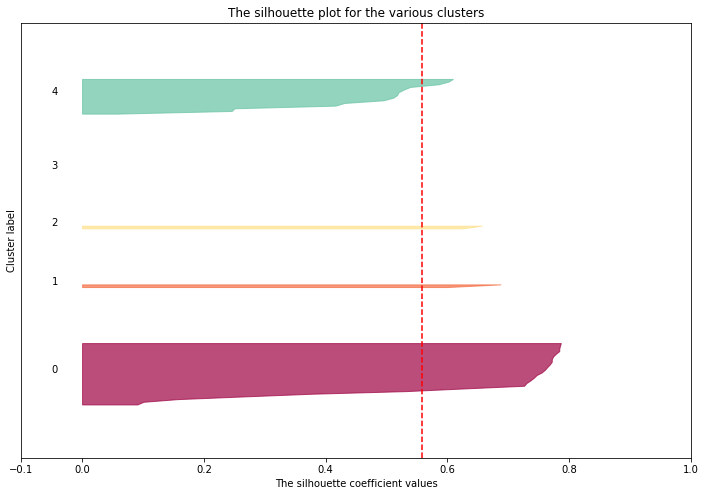

In [58]:
fig, ( ax1 ) = plt.subplots( 1, 1 )
fig.set_size_inches( 12, 8 )

ax1.set_xlim( [ -0.1, 1 ] )
ax1.set_ylim( [ 0, len( X ) + ( n_clusters + 1 ) * 20 ] )

# Calcula el valor de silueta para cada dato
sample_silhouette_values = silhouette_samples( X, clusters )

y_lower = 20
for i in range( n_clusters ):
    ith_cluster_silhouette_values = sample_silhouette_values[ clusters == i ]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[ 0 ]
    y_upper = y_lower + size_cluster_i

    color = cm.get_cmap("Spectral")( float( i ) / n_clusters )
    ax1.fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7 )

    ax1.text( -0.05, y_lower + 0.5 * size_cluster_i, str( i ) )

    y_lower = y_upper + 20

ax1.set_title( 'The silhouette plot for the various clusters' )
ax1.set_xlabel( 'The silhouette coefficient values' )
ax1.set_ylabel( 'Cluster label' )

ax1.axvline( x = silhouette_avg, color = 'red', linestyle = '--' )

ax1.set_yticks( [] )
ax1.set_xticks( [ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1 ] )

# Explicación de los clusters

In [59]:
subsidio_df.groupby( 'cluster' ).describe()

Código                                                       \
         count       mean        std   min   25%   50%    75%   max   
cluster                                                               
0         24.0  38.083333  21.149400   2.0  23.5  37.5  53.25  69.0   
1          2.0  14.000000  14.142136   4.0   9.0  14.0  19.00  24.0   
2          2.0  39.000000  25.455844  21.0  30.0  39.0  48.00  57.0   
3          1.0  22.000000        NaN  22.0  22.0  22.0  22.00  22.0   
4         14.0  24.142857  17.333192   3.0   8.5  23.5  37.75  56.0   

        Empresas Afiliadas                                                \
                     count          mean          std      min       25%   
cluster                                                                    
0                     24.0   3894.125000  2648.829312    550.0   1791.75   
1                      2.0  91032.500000  2501.036685  89264.0  90148.25   
2                      2.0  45718.500000   710.642315  45216.0  45467.25   
3                      1.0  86148.000000          NaN  86148.0  86148.00   
4                     14.0  13347.428571  4315.366135   6610.0  10365.75   

                                     \
             50%       75%      max   
cluster                               
0         3075.5   5781.50   8728.0   
1        91032.5  91916.75  92801.0   
2        45718.5  45969.75  46221.0   
3        86148.0  86148.00  86148.0   
4        12634.5  16306.00  19644.0   

        Total Afiliados Cajas Compensacion Familiar                \
                                              count          mean   
cluster                                                             
0                                              24.0  5.228567e+04   
1                                               2.0  1.193186e+06   
2                                               2.0  7.204655e+05   
3                                               1.0  1.661100e+06   
4                                              14.0  1.980151e+05   

                                                                      \
                   std        min         25%        50%         75%   
cluster                                                                
0         37258.689077     4747.0    23189.50    49853.0    80436.00   
1         90173.085164  1129424.0  1161305.00  1193186.0  1225067.00   
2        164869.724208   603885.0   662175.25   720465.5   778755.75   
3                  NaN  1661100.0  1661100.00  1661100.0  1661100.00   
4         78452.246746   102244.0   156833.75   178691.5   220616.50   

                   Trabajadores Afiliados Dependientes                \
               max                               count          mean   
cluster                                                                
0         125674.0                                24.0  4.894762e+04   
1        1256948.0                                 2.0  1.115730e+06   
2         837046.0                                 2.0  6.266600e+05   
3        1661100.0                                 1.0  1.612281e+06   
4         406702.0                                14.0  1.845201e+05   

                                                                     \
                  std        min         25%        50%         75%   
cluster                                                               
0        33500.874118     4712.0    22707.25    48993.5    65557.00   
1        41759.605177  1086201.0  1100965.25  1115729.5  1130493.75   
2        51256.756355   590416.0   608538.00   626660.0   644782.00   
3                 NaN  1612281.0  1612281.00  1612281.0  1612281.00   
4        79784.563888   101771.0   131688.00   166654.5   217451.75   

                   Afiliados Facultativos Independientes           \
               max                                 count     mean   
cluster                                                             
0         114004.0                

In [60]:
subsidio_df.loc[ subsidio_df[ 'cluster' ] == 3 ]

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
15,22,Caja Colombiana de Subsidio Familiar COLSUBSIDIO,86148,1661100,1612281,18431,9783,7341,13264,1793941,3455041,3


In [61]:
subsidio_df.loc[ subsidio_df[ 'cluster' ] == 1 ]

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257,1
16,24,Caja de Compensacion Familiar COMPENSAR,89264,1256948,1145258,66084,21797,6747,17062,1493281,2750229,1


In [62]:
subsidio_df.loc[ subsidio_df[ 'cluster' ] == 2 ]

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
14,21,Caja de Compensacion Familiar CAFAM,45216,837046,662904,151251,8958,6788,7145,808245,1645291,2
36,57,Caja de Compensacion Familiar del Valle del Ca...,46221,603885,590416,7130,6339,0,0,723626,1327511,2
